## Matplotlib

In [3]:
import nltk
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

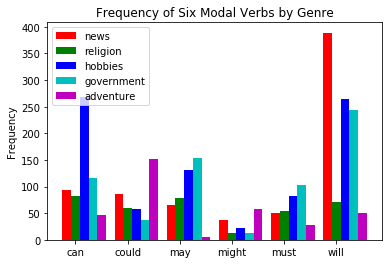

In [4]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
             (genre, word)
             for genre in genres
             for word in nltk.corpus.brown.words(categories=genre)
             if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [5]:
# Agg backend for matplotlib
# produce raster

# from matplotlib import use, pyplot
# use('Agg')
# pyplot.savefig('modals.png')
# print('Content-Type: text/html')
# print()
# print('<html><body>')
# print('<img src="modals.png"/>')
# print('</body></html>')

## NetworkX

In [46]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

from networkx.drawing.nx_agraph import graphviz_layout

def graph_draw(graph):
    pos = graphviz_layout(graph, prog='neato')
    #nx.draw(graph, pos)
    #nx.draw_graphviz(graph,
    #     node_size = [16 * graph.degree(n) for n in graph],
    #     node_color = [graph.depth[n] for n in graph],
    #     with_labels = False
    #)
    nx.draw(graph,
            pos,
            node_size = [16* graph.degree(n) for n in graph],
            node_color = [graph.depth[n] for n in graph],
            with_labels = False
    )
#    nx.pydot_layout(G=graph,
                    
    #)
    matplotlib.pyplot.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotl

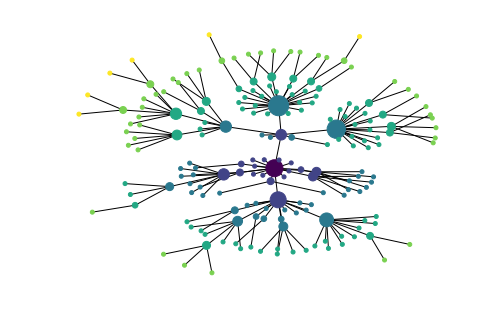

In [47]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

## CSV

In [50]:
import csv
input_file = open("lexicon.csv", "r")
for row in csv.reader(input_file):
    print(row)

['sleep', ' sli:p', ' v.i', ' a condition of body and mind ...']
['walk', ' wo:k', ' v.intr', ' progress by lifting and setting down each foot ...']
['wake', ' weik', ' intrans', ' cease to sleep']


## NumPy

In [51]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
               [[3,3,3], [4,4,4], [5,5,5]],
               [[6,6,6], [7,7,7], [8,8,8]] ])
cube[1,1,1]

4

In [52]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [53]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [54]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [56]:
# nltk.cluster
# gaussian, k-means, etc
help(nltk.cluster)

Help on package nltk.cluster in nltk:

NAME
    nltk.cluster

DESCRIPTION
    This module contains a number of basic clustering algorithms. Clustering
    describes the task of discovering groups of similar items with a large
    collection. It is also describe as unsupervised machine learning, as the data
    from which it learns is unannotated with class information, as is the case for
    supervised learning.  Annotated data is difficult and expensive to obtain in
    the quantities required for the majority of supervised learning algorithms.
    This problem, the knowledge acquisition bottleneck, is common to most natural
    language processing tasks, thus fueling the need for quality unsupervised
    approaches.
    
    This module contains a k-means clusterer, E-M clusterer and a group average
    agglomerative clusterer (GAAC). All these clusterers involve finding good
    cluster groupings for a set of vectors in multi-dimensional space.
    
    The K-means clusterer starts 

## Other Python Libraries

- mysql-python
- PyLucene
- pypdf, pywin32, xml.etree
- imaplib, email